In [146]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [19]:
df = pd.read_csv('../Data/galway_rentals.txt', delimiter='\t')

In [20]:
""" Encoding categorical features
Ordinal features:
    ber: a->exempt
    floor: third, second, first, ground

Nominal features: - no order
    type: house, studio, apartment, townhouse
    heating: central, electric, NA
    Balcony: yes, no
"""
ber = ['a', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3', 'd1', 'd2', 'e1', 'e2', 'f', 'g', 'exempt']
floor = ['third', 'second', 'first', 'ground']
ord_encoder = OrdinalEncoder(categories = [ber, floor])
df[['ber', 'floor']] = ord_encoder.fit_transform(df[["ber", 'floor']])

#lab_encoder = LabelEncoder()
oh_encoder = OneHotEncoder(sparse=False)
# transform data
oh_type = pd.DataFrame(oh_encoder.fit_transform(df[['type']]), columns=['apartment', "house", "studio", 'townhouse'])
oh_heating = pd.DataFrame(oh_encoder.fit_transform(df[['heating']]), columns=['central', "electric", "na"])
oh_balcony = pd.DataFrame(oh_encoder.fit_transform(df[['balcony']]),  columns=['no_balcony', "has_balcony"])

In [21]:
df = pd.concat([df, oh_type], axis=1)
df = pd.concat([df, oh_heating], axis=1)
df = pd.concat([df, oh_balcony], axis=1)
df.drop(columns=['type', 'balcony', 'heating'], axis=0, inplace=True)

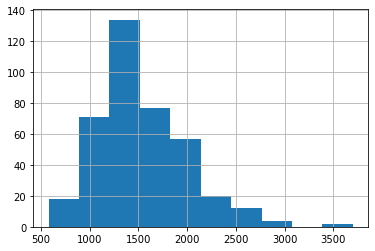

In [31]:
df['price_per_month'].hist(bins=10)

In [119]:
df['price_cat'] = pd.cut(df['price_per_month'], 
                        bins=[0,1200,1500, 2000,np.inf],
                        labels=[1,2,3,4])

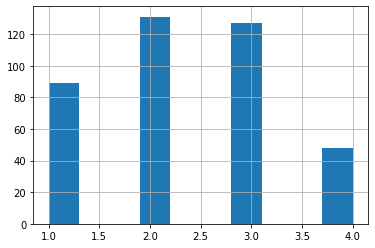

In [120]:
df['price_cat'].hist()

In [129]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [130]:
strat_train_set

,price_per_month,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms,ber,floor,apartment,house,studio,townhouse,central,electric,na,no_balcony,has_balcony,price_cat
372,900,2.764637,4.375421,3.664316,0.426744,1,1,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
364,950,0.563532,2.429172,1.148074,2.249201,1,1,6.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
80,1950,1.556770,1.913294,0.562976,3.941628,3,1,7.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
252,1350,4.204159,6.052815,4.828937,1.949476,2,3,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
346,1060,2.554136,0.665194,2.436579,4.890633,1,1,6.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1500,1.150220,0.751666,1.333127,3.533139,2,2,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
9,2700,2.091903,2.438934,1.095557,4.329656,5,2,5.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
77,1950,2.391339,1.719428,1.548100,4.913781,4,2,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
309,1200,2.092120,2.440261,1.095883,4.329222,3,1,13.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


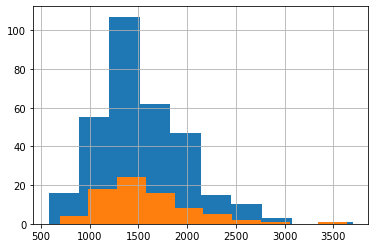

In [140]:
strat_train_set['price_per_month'].hist(label="train")
strat_test_set['price_per_month'].hist(label='test')


In [141]:
for i in (strat_train_set,strat_test_set):
    i.drop('price_cat', axis=1, inplace=True)

In [144]:
corr_matrix = df.corr()

In [145]:
corr_matrix["price_per_month"].sort_values(ascending=False)

price_per_month         1.000000
num_bedrooms            0.722936
num_bathrooms           0.545036
house                   0.485180
central                 0.276742
distance_gmit           0.092388
townhouse               0.090741
floor                   0.088034
has_balcony             0.008518
no_balcony             -0.008518
na                     -0.052071
distance_eyre_square   -0.142780
distance_salthill      -0.164176
ber                    -0.195112
distance_nuig          -0.219144
studio                 -0.252592
electric               -0.266251
apartment              -0.422840
Name: price_per_month, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259BCE32070>,
      dtype=object)

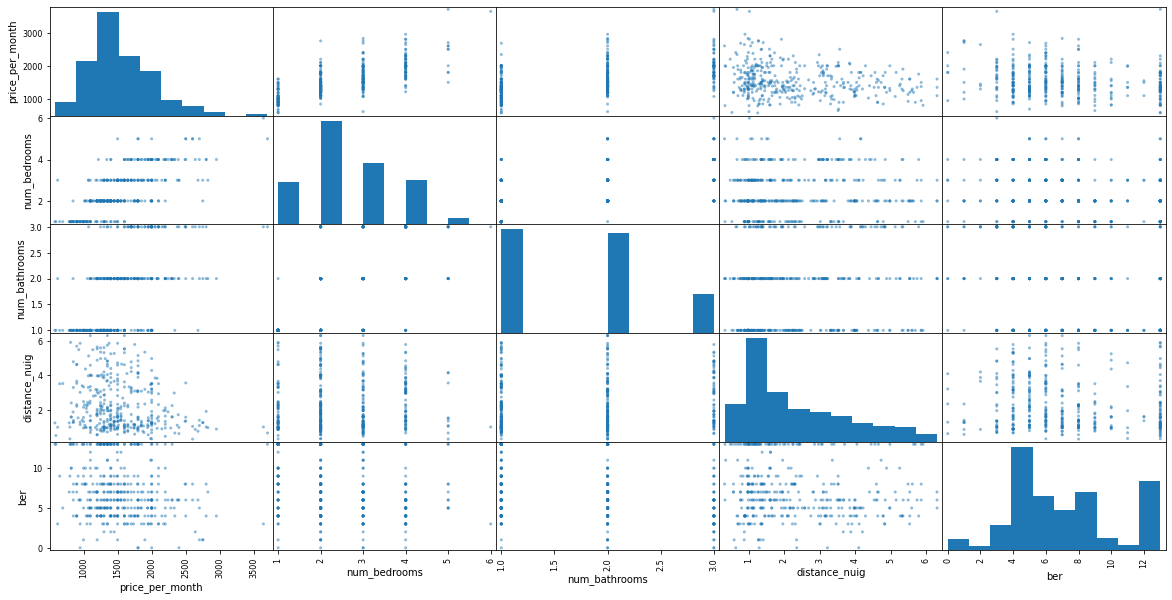

In [151]:
features = ['price_per_month', 'num_bedrooms', 'num_bathrooms', 'distance_nuig', 'ber']
scatter_matrix(df[features], figsize=(20,10))